In [4]:
%pylab
import powerlaw
import pickle
def load_dict(name):
        with open('dict-' + name + '.pkl', 'rb') as f:
                return pickle.load(f)
fire=load_dict("fire")

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


Here we apply the statistical machinery to investigate the properites of the total area burnt on Portugal. I use the module "powerlaw" that is consistent with the article " Power law in empirical data". See "powerlaw: a Python package for analysis of heavy-tailed distributions" as a reference.

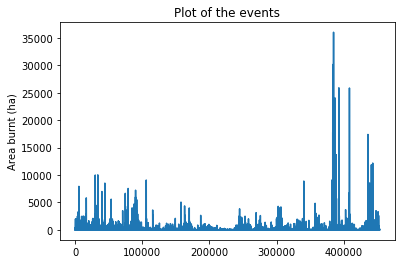

In [12]:
%matplotlib inline
fire=load_dict("fire")
a=fire["tot_burnt"]
plot(a)
ylabel("Area burnt (ha)")
title("Plot of the events")

Using matplotlib backend: Qt5Agg


Calculating best minimal value for power law fit
/home/giuseppe/miniconda3/lib/python3.5/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [123]:
%matplotlib
a=a[a>1]
fit=powerlaw.Fit(a,xmin_distance="Asquare")

x,y=fit.ccdf(original_data=True)
#plot(x,y,".")
plot(sort(a),len(a)-arange(0,len(a))) 
loglog()
fit.Asquare
print("Anderson-Darling distance"+str(fit.xmin))
axvline(fit.xmin,label="Anderson-Darling")
fit=powerlaw.Fit(a,xmin_distance="D")
axvline(fit.xmin,ls="--",c="r",label="KS")
legend()

Using matplotlib backend: Qt5Agg


Calculating best minimal value for power law fit
/home/giuseppe/miniconda3/lib/python3.5/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Anderson-Darling distance1170.0


Calculating best minimal value for power law fit


/home/giuseppe/miniconda3/lib/python3.5/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit


Anderson-Darling distance1170.0


Calculating best minimal value for power law fit


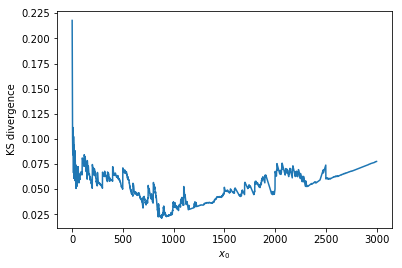

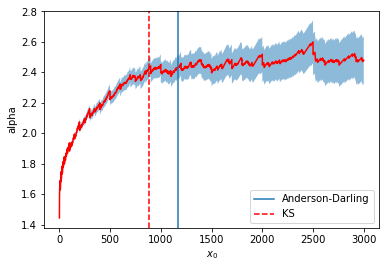

In [124]:
%matplotlib inline
KS=[]
alpha=[]
sigma=[]
for i in arange(min(a), 3000):
    fit=powerlaw.Fit(a,xmin=i,discrete=True)
    KS+=[fit.D]
    alpha+=[fit.alpha]
    sigma+=[fit.sigma]
alpha=array(alpha)
sigma=array(sigma)
plot(arange(min(a),3000),KS,"-")
xlabel("$x_0$")
ylabel("KS divergence")
figure()
plot(arange(min(a),3000),alpha,"r-")
fill_between(arange(min(a),3000),alpha+sigma,alpha-sigma,alpha=0.5)
xlabel("$x_0$")
ylabel("alpha")

fit=powerlaw.Fit(a,xmin_distance="Asquare")
fit.Asquare
print("Anderson-Darling distance"+str(fit.xmin))
axvline(fit.xmin,label="Anderson-Darling")
fit=powerlaw.Fit(a,xmin_distance="D")
axvline(fit.xmin,ls="--",c="r",label="KS")
legend()

In [120]:
axvline?